In [1]:
import pandas as pd
import numpy as np
import os
import glob

pd.options.display.max_columns = None
pd.options.display.max_rows = None

#inpath = '/MFMDatasets/MFM_bopf/src/multi_predict/'
inpath = '/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/'
outpath = '/MFMDatasets/MFM_bopf/src/multi_predict/results/'
#out_flag = True
out_flag = False

#Cutoff_stat = "ROC_AUC"
Cutoff_stat = "MCC"
CUTOFF = 0.200

#SORT_STAT = "ROC_AUC"
#SORT_STAT = "MCC"
SORT_STAT = "PR_AUC"

alg = "LR"
#alg_cols = ['target','under_alg','samp_strat','p_C','p_solver','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','MCC','TP','FN','FP','TN']
alg_cols = ['target','under_alg','samp_strat','p_C','p_solver','precision_macro','recall_macro','F1_macro','PR_AUC',
            'ROC_AUC','MCC','TP','FN','FP','TN','Fb1_1','Fb1_2','Fb1_m','Fb2_1','Fb2_2','Fb2_m','Fb05_1','Fb05_2','Fb05_m',
            'Gmean_1','Gmean_2','Gmean_ma','Max Gmean','Max Thresh','Sens_1','Sens_2','Sens_ma',
            'Spec_1','Spec_2','Spec_ma'
           ]

#alg = "NB"
#alg_cols = ['target','under_alg','p_var_smoothing','seed','ROC_AUC','MCC']

#alg = "SVC"
#alg_cols = ['under_alg','samp_strat','p_C','p_kernel','p_degree','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','MCC','TP','FN','FP','TN']

#alg = "MLP"
#alg_cols = ['under_alg','samp_strat','p_alpha','p_hidden_layer_sizes','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','MCC','TP','FN','FP','TN']
#CUTOFF = 0.210

#alg = "RF"
#alg_cols = ['under_alg','samp_strat','p_n_estimators','p_max_depth','p_min_samples_leaf','p_min_samples_split','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','MCC','TP','FN','FP','TN']
#alg_cols = ['under_alg','samp_strat','p_n_estimators','p_max_depth','p_min_samples_leaf',
#            'p_min_samples_split','precision_macro','recall_macro','F1_macro','PR_AUC',
#            'ROC_AUC','MCC','TP','FN','FP','TN','Fb1_1','Fb1_2','Fb1_m','Fb2_1','Fb2_2','Fb2_m',
#            'Gmean_1','Gmean_2','Gmean_ma','Max Gmean','Max Thresh','Sens_1','Sens_2','Sens_ma',
#            'Spec_1','Spec_2','Spec_ma'
#           ]

#alg = "GB"
#alg_cols = ['under_alg','samp_strat','p_n_estimators','p_max_depth','p_subsample','p_learning_rate','precision_macro','recall_macro','F1_macro','PR_AUC','ROC_AUC','MCC','TP','FN','FP','TN']
#CUTOFF = 0.230

os.chdir(inpath + alg + '/output')
#os.chdir(inpath + alg + '/Oct2020/output')
#os.chdir(inpath + alg + '/Nov2020/output')

#dataset = "transfus_yes"
#dataset = "Hysterectomy"
dataset = "*"
#dataset = "trans*"
ext = '.csv'
glob_string = dataset + "*-" + alg + "-*"
files = glob.glob(glob_string + ext)
#files = glob.glob("*-" + alg + "-*" + ext)
#files = glob.glob("transfus_yes*-" + alg + "-*" + ext)

results_df = pd.DataFrame()
#os.chdir('/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output')
#os.chdir('/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output')
#os.chdir('/MFMDatasets/MFM_bopf/src/multi_predict/NB/output')
#files = glob.glob("*-NB-*.csv")
#files = glob.glob("*-MLP-*.csv")
#files = glob.glob("*-SVC-*.csv")
#files = glob.glob("transfus_yes*-MLP-*.csv")
#files = glob.glob("transfus_yes*-MLP-*]_0.*_500*.csv")
#files = glob.glob("transfus_hyster*-MLP-*.csv")
#files = glob.glob("transfus_yes*-MLP-*.csv")
#files = glob.glob("transfus_yes*-MLP-*.csv")
len(files)

40

In [2]:
def remove_dups(file):
    base = glob.escape(file[:-4])
    print(f'base = {base}')
    dup_files = glob.glob(base + '*')
    print(dup_files)
    for dup_file in dup_files:
        print(f'Removing duplicate: {dup_file}')
        os.remove(dup_file)

In [3]:
files = sorted(files, reverse=True)
for i in range(len(files)-1):
    if files[i][:-20] == files[i+1][:-20]:
        print(f'DUP:{files[i]}')
        remove_dups(files[i])

files = glob.glob(glob_string + ext)
files = sorted(files, reverse=True)
print(f'len(files) = {len(files)}')

len(files) = 40


In [4]:
prev_f = ""
for idx, f in enumerate(files):
    print(f'idx={idx}; file={f}')
    if prev_f[:-20] == f[:-20]:   #if the filenames only differ by timestamp
        print(f'DUP:{prev_f}')
        continue   #skip "duplicate"
        
    if results_df.empty:
        results_df = pd.read_csv(f, header=None, index_col=0, names=[idx])
    else:
        this_df = pd.read_csv(f, header=None, index_col=0, names=[idx])
        results_df = results_df.merge(this_df, left_index=True, right_index=True, how="right")
    prev_f = f
results_df

idx=0; file=transfus_yes-0-RAND-LR-1_10000000_7_liblinear-1-1.0-20210128_131118.csv
idx=1; file=transfus_yes-0-RAND-LR-1_10000000_7_lbfgs-1-1.0-20210128_131159.csv
idx=2; file=transfus_yes-0-RAND-LR-10_10000000_7_liblinear-1-1.0-20210128_131119.csv
idx=3; file=transfus_yes-0-RAND-LR-10_10000000_7_lbfgs-1-1.0-20210128_131201.csv
idx=4; file=transfus_yes-0-RAND-LR-100_10000000_7_liblinear-1-1.0-20210128_131123.csv
idx=5; file=transfus_yes-0-RAND-LR-100_10000000_7_lbfgs-1-1.0-20210128_131210.csv
idx=6; file=transfus_yes-0-RAND-LR-1000_10000000_7_liblinear-1-1.0-20210128_131127.csv
idx=7; file=transfus_yes-0-RAND-LR-1000_10000000_7_lbfgs-1-1.0-20210128_131208.csv
idx=8; file=transfus_yes-0-RAND-LR-10000_10000000_7_liblinear-1-1.0-20210128_131131.csv
idx=9; file=transfus_yes-0-RAND-LR-10000_10000000_7_lbfgs-1-1.0-20210128_131208.csv
idx=10; file=transfus_yes-0-RAND-LR-100000_10000000_7_liblinear-1-1.0-20210128_131135.csv
idx=11; file=transfus_yes-0-RAND-LR-100000_10000000_7_lbfgs-1-1.0-2021

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
CLF_time(min),0.027,0.718,0.025,0.718,0.067,0.824,0.084,0.745,0.114,0.705,0.140,0.678,0.027,0.529,0.032,0.173,0.023,0.134,0.030,0.077,0.079,1.265,0.099,0.950,0.282,1.206,0.376,1.137,0.345,1.154,0.354,1.054,0.035,0.820,0.048,0.151,0.046,0.107,0.057,0.062
target,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,transfus_yes,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss,trans_loss
under_alg,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND,RAND
pred_alg,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR,LR
seed,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
samp_strat,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sample_tts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
p_C,1,1,10,10,100,100,1000,1000,10000,10000,100000,100000,0.1,0.1,0.01,0.01,0.001,0.001,0.0001,0.0001,1,1,10,10,100,100,1000,1000,10000,10000,100000,100000,0.1,0.1,0.01,0.01,0.001,0.001,0.0001,0.0001
p_max_iter,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000
p_random_state,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [5]:
results_T = results_df.T
#results_T.sort_values(by=['ROC_AUC'], ascending=False, inplace=True)
#results_T.sort_values(by=['PR_AUC'], ascending=False, inplace=True)
#results_T.sort_values(by=['MCC'], ascending=False, inplace=True)
results_T.sort_values(by=[SORT_STAT], ascending=False, inplace=True)
small = results_T[alg_cols]
small
#small = small[small['under_alg'] == 'NONE']
#small

,target,under_alg,samp_strat,p_C,p_solver,precision_macro,recall_macro,F1_macro,PR_AUC,ROC_AUC,MCC,TP,FN,FP,TN,Fb1_1,Fb1_2,Fb1_m,Fb2_1,Fb2_2,Fb2_m,Fb05_1,Fb05_2,Fb05_m,Gmean_1,Gmean_2,Gmean_ma,Max Gmean,Max Thresh,Sens_1,Sens_2,Sens_ma,Spec_1,Spec_2,Spec_ma
30,trans_loss,RAND,1.0,100000,liblinear,0.5554,0.7429,0.5067,0.1811,0.8089,0.2321,2545,558,17563,34958,0.7942,0.2193,0.5067,0.7117,0.3913,0.5515,0.8983,0.1523,0.5253,0.7389,0.7389,0.7429,0.7415,0.4702,0.6656,0.8202,0.7429,0.8202,0.6656,0.7429
24,trans_loss,RAND,1.0,100,liblinear,0.5554,0.7430,0.5064,0.1811,0.8092,0.2320,2548,555,17604,34917,0.7936,0.2191,0.5064,0.7110,0.3912,0.5511,0.8980,0.1522,0.5251,0.7389,0.7389,0.7430,0.7416,0.4824,0.6648,0.8211,0.7430,0.8211,0.6648,0.7430
22,trans_loss,RAND,1.0,10,liblinear,0.5555,0.7433,0.5069,0.1809,0.8089,0.2324,2547,556,17557,34964,0.7943,0.2195,0.5069,0.7118,0.3917,0.5517,0.8984,0.1525,0.5254,0.7392,0.7392,0.7433,0.7410,0.4750,0.6657,0.8208,0.7433,0.8208,0.6657,0.7433
28,trans_loss,RAND,1.0,10000,liblinear,0.5555,0.7433,0.5067,0.1806,0.8090,0.2324,2548,555,17574,34947,0.7940,0.2194,0.5067,0.7115,0.3916,0.5515,0.8982,0.1524,0.5253,0.7392,0.7392,0.7433,0.7414,0.4734,0.6654,0.8211,0.7433,0.8211,0.6654,0.7433
26,trans_loss,RAND,1.0,1000,liblinear,0.5554,0.7431,0.5066,0.1806,0.8092,0.2322,2548,555,17589,34932,0.7938,0.2193,0.5066,0.7112,0.3914,0.5513,0.8981,0.1523,0.5252,0.7390,0.7390,0.7431,0.7414,0.4761,0.6651,0.8211,0.7431,0.8211,0.6651,0.7431
25,trans_loss,RAND,1.0,100,lbfgs,0.5554,0.7428,0.5069,0.1802,0.8089,0.2320,2543,560,17542,34979,0.7944,0.2193,0.5069,0.7120,0.3913,0.5517,0.8984,0.1524,0.5254,0.7388,0.7388,0.7428,0.7404,0.4711,0.6660,0.8195,0.7428,0.8195,0.6660,0.7428
27,trans_loss,RAND,1.0,1000,lbfgs,0.5556,0.7437,0.5073,0.1800,0.8088,0.2329,2548,555,17529,34992,0.7947,0.2198,0.5073,0.7123,0.3921,0.5522,0.8986,0.1527,0.5257,0.7397,0.7397,0.7437,0.7406,0.4678,0.6662,0.8211,0.7437,0.8211,0.6662,0.7437
20,trans_loss,RAND,1.0,1,liblinear,0.5555,0.7432,0.5068,0.1796,0.8090,0.2324,2547,556,17560,34961,0.7942,0.2195,0.5068,0.7117,0.3916,0.5517,0.8983,0.1525,0.5254,0.7392,0.7392,0.7432,0.7412,0.4701,0.6657,0.8208,0.7432,0.8208,0.6657,0.7432
31,trans_loss,RAND,1.0,100000,lbfgs,0.5554,0.7430,0.5067,0.1793,0.8085,0.2322,2546,557,17568,34953,0.7941,0.2193,0.5067,0.7116,0.3914,0.5515,0.8983,0.1523,0.5253,0.7389,0.7389,0.7430,0.7404,0.4707,0.6655,0.8205,0.7430,0.8205,0.6655,0.7430
21,trans_loss,RAND,1.0,1,lbfgs,0.5555,0.7429,0.5070,0.1793,0.8086,0.2322,2544,559,17540,34981,0.7945,0.2194,0.5070,0.7121,0.3914,0.5518,0.8984,0.1524,0.5254,0.7390,0.7390,0.7429,0.7409,0.4669,0.6660,0.8199,0.7429,0.8199,0.6660,0.7429


In [6]:
#num = 80
#print(f'files[{num-1}] = {files[num-1]}')

In [7]:
if out_flag:
    if dataset == '*':
        small.to_csv(outpath + alg + '-ALL-MCC-Results.csv')
    elif dataset == 'trans*':
        small.to_csv(outpath + alg + '-TRANS-MCC-Results.csv')
    else:
        small.to_csv(outpath + alg + "-" + dataset + '-MCC-Results.csv')

In [8]:
# already in the correct directory from above: os.chdir(inpath + alg + '/output')
ext = '.out'
#files = glob.glob("*-" + alg + "-*" + ext)
#files = glob.glob("Hyster" + glob_prefix + ext)
files = glob.glob(glob_string + ext)
print(f'len(files) = {len(files)}')


len(files) = 40


In [9]:
files = sorted(files, reverse=True)
for i in range(len(files)-1):
    #print(f'i={i}; file={files[i]}')
    if files[i][:-20] == files[i+1][:-20]:
        print(f'{files[i]}')
print(f'len(files) = {len(files)}')

len(files) = 40


In [10]:
from tokenize import tokenize

high_coeff_files = set()
pd.options.display.float_format = '{:,.4f}'.format
prev_f = ""
coeffs_df = pd.DataFrame()
coeffs_rank_df = pd.DataFrame()
for idx, f in enumerate(files):
    print(f'idx={idx}; file={f}')
    if prev_f[:-20] == f[:-20]:   #if the filenames only differ by timestamp
        print(f'DUP:{prev_f}')
        continue   #skip "duplicate"
 
    with open(f, 'r') as file:
        found_coef = False
        cutoff = False
        coef_series = pd.Series()
        ind_vars = []
        coef_vals = []
        for line in file:
            # Add ROC_AUC cutoff
            #if "ROC_AUC" in line:
            #    roc_auc = line.split()[2]   
            #    if float(roc_auc) < CUTOFF:
            #        cutoff = True
            #        print(f'roc_auc = {roc_auc}; idx={idx}; cutoff = {cutoff}')
            #        break    # Stop processing this file; poor performance
            
            # Cutoff stat
            if Cutoff_stat in line:
                cut_stat = line.split()[2]   
                if float(cut_stat) < CUTOFF:
                    cutoff = True
                    print(f'cut_stat = {cut_stat}; idx={idx}')
                    break    # Stop processing this file; poor performance
            
            if "coeffs =" in line:
                found_coef = True
                #print(f"found_coef: idx={idx}; file={f}")
                continue
            
            if found_coef:
                var_coef = line.split()
                if var_coef[0] != 'dtype:':
                    ind_vars.append(var_coef[0])
                    coef_vals.append(float(var_coef[1]))
                    if float(var_coef[1]) > 100:
                        high_coeff_files.add(f)
                
        if not cutoff and found_coef:
            if coeffs_df.empty:
                coeffs_df = pd.DataFrame(data=coef_vals, index=ind_vars, columns=[idx])
                coeffs_rank_df = pd.DataFrame(data=coeffs_df[idx].rank(ascending=False).astype(int), columns=[idx])
            else:
                this_df = pd.DataFrame(data=coef_vals, index=ind_vars, columns=[idx])
                this_rank_df = pd.DataFrame(data=this_df[idx].rank(ascending=False).astype(int), columns=[idx])
                coeffs_df = coeffs_df.merge(this_df, left_index=True, right_index=True, how="left")
                coeffs_rank_df = coeffs_rank_df.merge(this_rank_df, left_index=True, right_index=True, how="left")

    prev_f = f
    
coeffs_df

idx=0; file=transfus_yes-0-RAND-LR-1_10000000_7_liblinear-1-1.0-20210128_131118.out
idx=1; file=transfus_yes-0-RAND-LR-1_10000000_7_lbfgs-1-1.0-20210128_131159.out
idx=2; file=transfus_yes-0-RAND-LR-10_10000000_7_liblinear-1-1.0-20210128_131119.out
idx=3; file=transfus_yes-0-RAND-LR-10_10000000_7_lbfgs-1-1.0-20210128_131201.out
idx=4; file=transfus_yes-0-RAND-LR-100_10000000_7_liblinear-1-1.0-20210128_131123.out


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


idx=5; file=transfus_yes-0-RAND-LR-100_10000000_7_lbfgs-1-1.0-20210128_131210.out
idx=6; file=transfus_yes-0-RAND-LR-1000_10000000_7_liblinear-1-1.0-20210128_131127.out
idx=7; file=transfus_yes-0-RAND-LR-1000_10000000_7_lbfgs-1-1.0-20210128_131208.out
idx=8; file=transfus_yes-0-RAND-LR-10000_10000000_7_liblinear-1-1.0-20210128_131131.out
idx=9; file=transfus_yes-0-RAND-LR-10000_10000000_7_lbfgs-1-1.0-20210128_131208.out
idx=10; file=transfus_yes-0-RAND-LR-100000_10000000_7_liblinear-1-1.0-20210128_131135.out
idx=11; file=transfus_yes-0-RAND-LR-100000_10000000_7_lbfgs-1-1.0-20210128_131211.out
idx=12; file=transfus_yes-0-RAND-LR-0.1_10000000_7_liblinear-1-1.0-20210128_131117.out
idx=13; file=transfus_yes-0-RAND-LR-0.1_10000000_7_lbfgs-1-1.0-20210128_131147.out
idx=14; file=transfus_yes-0-RAND-LR-0.01_10000000_7_liblinear-1-1.0-20210128_130959.out
idx=15; file=transfus_yes-0-RAND-LR-0.01_10000000_7_lbfgs-1-1.0-20210128_131007.out
idx=16; file=transfus_yes-0-RAND-LR-0.001_10000000_7_libli

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
HosEpiNurse,1.5772,1.5862,1.5765,1.5867,1.5761,1.6152,1.5866,1.5975,1.6075,1.6053,1.6284,1.6004,1.3476,1.3735,0.6374,0.6570,0.1152,0.1238,0.0153,0.0170,0.6978,0.7054,0.7014,0.7110,0.7002,0.7292,0.7059,0.7158,0.6992,0.7013,0.6922,0.6989,0.6805,0.6667,0.4783,0.4821,0.1180,0.1179,0.0140,0.0141
previa9,1.1135,1.7201,1.5095,1.3470,1.5793,2.1439,1.4312,1.9269,1.9512,2.0171,2.0127,2.0709,0.7325,0.8528,0.2172,0.1643,0.0398,0.0238,0.0046,0.0026,0.5271,0.5373,0.5770,0.4778,0.5703,0.5459,0.5466,0.5464,0.5608,0.5164,0.5928,0.5654,0.4253,0.4306,0.2021,0.2021,0.0472,0.0469,0.0064,0.0064
IntraMgSO,0.9090,0.8815,0.8872,0.8980,0.9002,0.8782,0.8775,0.9110,0.8784,0.9615,0.8935,0.9122,0.7735,0.7626,0.3716,0.3167,0.0725,0.0539,0.0090,0.0071,0.3794,0.3835,0.3788,0.3381,0.4006,0.3801,0.3985,0.3784,0.3875,0.3589,0.3931,0.3781,0.3272,0.3184,0.2162,0.2176,0.0610,0.0606,0.0086,0.0086
Anteanemia,0.8472,0.8336,0.8516,0.8470,0.8573,0.8406,0.8449,0.8664,0.8555,0.8988,0.8386,0.8495,0.7264,0.7342,0.3445,0.3238,0.0672,0.0567,0.0087,0.0071,0.5048,0.5161,0.5151,0.4920,0.4995,0.5100,0.5301,0.5194,0.5113,0.4962,0.5041,0.5081,0.4776,0.4694,0.3244,0.3270,0.0862,0.0858,0.0125,0.0125
abruption,0.7381,0.8732,0.8401,0.7940,0.8646,1.1486,0.8168,0.9628,1.0617,0.9951,1.0577,1.0335,0.5889,0.6150,0.2830,0.2281,0.0632,0.0425,0.0084,0.0059,1.0762,0.8607,1.1914,0.4870,1.2213,0.9179,1.2384,0.8357,1.2139,0.7874,1.2260,0.8655,0.5315,0.4263,0.2144,0.2144,0.0574,0.0570,0.0086,0.0086
Intraabrupt,0.5835,0.6202,0.5429,0.5922,0.5323,0.3299,0.5585,0.5397,0.3960,0.5117,0.3841,0.4520,0.4567,0.4474,0.2211,0.1648,0.0496,0.0309,0.0066,0.0044,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
ThreatenedPB,0.4586,0.4387,0.3215,0.4142,0.3424,0.4108,0.3053,0.3817,0.4301,0.4320,0.3993,0.4210,0.2700,0.2627,0.0156,0.1189,0.0153,0.0127,0.0030,0.0000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AB_ceph,0.3785,0.3703,0.3264,0.3661,0.3274,0.3677,0.3297,0.3339,0.3751,0.3454,0.3583,0.3452,0.2986,0.2839,0.1318,0.0894,0.0261,0.0133,0.0037,0.0020,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Delmode,0.3438,0.3432,0.3452,0.3436,0.3482,0.3476,0.3446,0.3449,0.3446,0.3449,0.3478,0.3421,0.3350,0.3350,0.2984,0.2978,0.1853,0.1772,0.0450,0.0414,0.1727,0.1544,0.2105,0.2081,0.1674,0.1788,0.1573,0.1768,0.1767,0.1968,0.2102,0.1494,0.2036,0.2170,0.2124,0.2108,0.2094,0.2096,0.1324,0.1324
Antesteroid,0.3262,0.3164,0.3194,0.3248,0.3132,0.3343,0.3284,0.3072,0.3425,0.3014,0.3244,0.3043,0.3016,0.2912,0.1850,0.1057,0.0484,0.0224,0.0078,0.0049,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [11]:
if out_flag:
    if dataset == '*':
        coeffs_df.to_csv(outpath + alg + '-ALL-coeffs.csv')
    elif dataset == 'trans*':
        coeffs_df.to_csv(outpath + alg + '-TRANS-coeffs.csv')
    else:
        coeffs_df.to_csv(outpath + alg + "-" + dataset + '-coeffs.csv')

In [12]:
coeffs_rank_df['mean_rank'] = coeffs_rank_df.apply(np.mean, axis=1).rank().astype(int)
coeffs_rank_df = coeffs_rank_df.astype('Int8')
coeffs_rank_df.sort_values('mean_rank', inplace=True)
print(f'Count: {coeffs_rank_df.shape}')
coeffs_rank_df

Count: (51, 41)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,mean_rank
HosEpiNurse,1,2,1,1,2,2,1,2,2,2,2,2,1,1,1,1,4,4,14,12,5,6,7,2,8,6,6,6,7,5,7,6,2,2,2,2,6,6,19,19,1
abruption,5,4,5,5,4,3,5,3,3,3,3,3,5,5,5,6,13,16,24,27,2,3,2,8,2,3,2,3,2,3,2,3,4,9,13,13,16,16,31,31,2
Anteanemia,4,5,4,4,5,5,4,5,5,5,5,5,4,4,3,2,10,9,21,24,12,12,12,7,13,12,12,12,12,12,13,13,7,7,5,5,10,10,23,23,3
Intraabrupt,6,6,6,6,6,13,6,6,7,6,9,6,6,6,7,9,15,19,29,33,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,4
previa9,2,1,2,2,1,1,2,1,1,1,1,1,3,2,8,10,18,26,36,38,10,10,9,9,10,11,10,10,10,11,9,10,11,8,17,17,21,21,41,41,5
IntraMgSO,3,3,3,3,3,4,3,4,4,4,4,4,2,3,2,3,9,11,17,23,18,19,17,19,17,19,17,20,18,21,17,19,20,20,12,12,14,14,32,32,6
abruptio9,13,11,11,11,10,7,11,8,10,8,7,9,12,11,17,16,27,28,44,35,3,2,3,5,4,2,3,2,3,4,4,2,5,5,20,20,25,25,43,43,7
Antesteroid,10,10,10,10,11,12,9,12,12,12,12,12,8,8,10,20,16,27,27,31,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8
Delmode,9,9,7,9,7,11,7,10,11,11,11,11,7,7,4,4,2,2,4,4,31,31,30,28,32,31,32,31,32,29,30,31,28,26,14,14,2,2,2,2,9
AB_ceph,8,8,8,8,9,9,8,11,9,10,10,10,9,9,16,22,29,38,43,41,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,10


In [13]:
if out_flag:
    if dataset == '*':
        coeffs_rank_df.to_csv(outpath + alg + '-ALL-coef_rank.csv')
    elif dataset == 'trans*':
        coeffs_rank_df.to_csv(outpath + alg + '-TRANS-coef_rank.csv')
    else:
        coeffs_rank_df.to_csv(outpath + alg + "-" + dataset + '-coef_rank.csv')

In [14]:
coeffs_rank_inv = coeffs_rank_df.T
#combo = pd.concat([small, coeffs_rank_inv['abruptio9']], axis=1, join='inner')
combo = pd.concat([small, coeffs_rank_inv], axis=1, join='inner')
combo

,target,under_alg,samp_strat,p_C,p_solver,precision_macro,recall_macro,F1_macro,PR_AUC,ROC_AUC,MCC,TP,FN,FP,TN,Fb1_1,Fb1_2,Fb1_m,Fb2_1,Fb2_2,Fb2_m,Fb05_1,Fb05_2,Fb05_m,Gmean_1,Gmean_2,Gmean_ma,Max Gmean,Max Thresh,Sens_1,Sens_2,Sens_ma,Spec_1,Spec_2,Spec_ma,HosEpiNurse,abruption,Anteanemia,Intraabrupt,previa9,IntraMgSO,abruptio9,Antesteroid,Delmode,AB_ceph,HosEpitype,ThreatenedPB,Insurance,MthInd_AROM,Anteprevia,Intratocolytix,Anteabruption,Delfetalpos,HospElectCS,Marital,Ind_Unkn,ga,previa_chart,HospElectInd,Parity,high_height,Education,Ind_elect,Hostype,ROMmeth,AdmBishop,BESTGA,momrace_new,Meconium,MthInd_Oxy,DMControl,Episiotomy,Admconsistency,HxnumCS,Dilat_lst,Admreason,Operative,Admcervpos,AdmSBP,Admcontract,AdmDBP,Admpresent,Presentdel,Admefface,Augment,Inoxy_incrdose
30,trans_loss,RAND,1.0,100000,liblinear,0.5554,0.7429,0.5067,0.1811,0.8089,0.2321,2545,558,17563,34958,0.7942,0.2193,0.5067,0.7117,0.3913,0.5515,0.8983,0.1523,0.5253,0.7389,0.7389,0.7429,0.7415,0.4702,0.6656,0.8202,0.7429,0.8202,0.6656,0.7429,7,2,13,<NA>,9,17,4,<NA>,30,<NA>,<NA>,<NA>,31,<NA>,11,32,1,<NA>,23,<NA>,22,21,27,<NA>,<NA>,<NA>,40,<NA>,44,36,41,25,37,<NA>,<NA>,33,39,<NA>,43,50,42,<NA>,<NA>,47,46,49,45,48,51,52,53
24,trans_loss,RAND,1.0,100,liblinear,0.5554,0.7430,0.5064,0.1811,0.8092,0.2320,2548,555,17604,34917,0.7936,0.2191,0.5064,0.7110,0.3912,0.5511,0.8980,0.1522,0.5251,0.7389,0.7389,0.7430,0.7416,0.4824,0.6648,0.8211,0.7430,0.8211,0.6648,0.7430,8,2,13,<NA>,10,17,4,<NA>,32,<NA>,<NA>,<NA>,30,<NA>,11,31,1,<NA>,21,<NA>,23,19,29,<NA>,<NA>,<NA>,40,<NA>,42,36,41,24,37,<NA>,<NA>,34,38,<NA>,44,49,43,<NA>,<NA>,47,46,50,45,48,51,52,53
22,trans_loss,RAND,1.0,10,liblinear,0.5555,0.7433,0.5069,0.1809,0.8089,0.2324,2547,556,17557,34964,0.7943,0.2195,0.5069,0.7118,0.3917,0.5517,0.8984,0.1525,0.5254,0.7392,0.7392,0.7433,0.7410,0.4750,0.6657,0.8208,0.7433,0.8208,0.6657,0.7433,7,2,12,<NA>,9,17,3,<NA>,30,<NA>,<NA>,<NA>,31,<NA>,13,32,1,<NA>,24,<NA>,22,21,25,<NA>,<NA>,<NA>,40,<NA>,46,35,41,26,37,<NA>,<NA>,33,39,<NA>,43,49,42,<NA>,<NA>,47,45,50,44,48,51,52,53
28,trans_loss,RAND,1.0,10000,liblinear,0.5555,0.7433,0.5067,0.1806,0.8090,0.2324,2548,555,17574,34947,0.7940,0.2194,0.5067,0.7115,0.3916,0.5515,0.8982,0.1524,0.5253,0.7392,0.7392,0.7433,0.7414,0.4734,0.6654,0.8211,0.7433,0.8211,0.6654,0.7433,7,2,12,<NA>,10,18,3,<NA>,32,<NA>,<NA>,<NA>,30,<NA>,13,31,1,<NA>,23,<NA>,24,21,26,<NA>,<NA>,<NA>,40,<NA>,48,36,41,25,37,<NA>,<NA>,33,39,<NA>,43,49,42,<NA>,<NA>,46,45,50,44,47,51,52,53
26,trans_loss,RAND,1.0,1000,liblinear,0.5554,0.7431,0.5066,0.1806,0.8092,0.2322,2548,555,17589,34932,0.7938,0.2193,0.5066,0.7112,0.3914,0.5513,0.8981,0.1523,0.5252,0.7390,0.7390,0.7431,0.7414,0.4761,0.6651,0.8211,0.7431,0.8211,0.6651,0.7431,6,2,12,<NA>,10,17,3,<NA>,32,<NA>,<NA>,<NA>,30,<NA>,13,31,1,<NA>,24,<NA>,26,19,28,<NA>,<NA>,<NA>,40,<NA>,46,36,41,25,37,<NA>,<NA>,34,38,<NA>,43,49,42,<NA>,<NA>,47,45,50,44,48,51,52,53
25,trans_loss,RAND,1.0,100,lbfgs,0.5554,0.7428,0.5069,0.1802,0.8089,0.2320,2543,560,17542,34979,0.7944,0.2193,0.5069,0.7120,0.3913,0.5517,0.8984,0.1524,0.5254,0.7388,0.7388,0.7428,0.7404,0.4711,0.6660,0.8195,0.7428,0.8195,0.6660,0.7428,6,3,12,<NA>,11,19,2,<NA>,31,<NA>,<NA>,<NA>,29,<NA>,16,30,1,<NA>,25,<NA>,23,21,17,<NA>,<NA>,<NA>,39,<NA>,43,35,40,26,37,<NA>,<NA>,32,38,<NA>,44,49,41,<NA>,<NA>,48,46,50,45,47,51,52,53
27,trans_loss,RAND,1.0,1000,lbfgs,0.5556,0.7437,0.5073,0.1800,0.8088,0.2329,2548,555,17529,34992,0.7947,0.2198,0.5073,0.7123,0.3921,0.5522,0.8986,0.1527,0.5257,0.7397,0.7397,0.7437,0.7406,0.4678,0.6662,0.8211,0.7437,0.8211,0.6662,0.7437,6,3,12,<NA>,10,20,2,<NA>,31,<NA>,<NA>,<NA>,29,<NA>,17,30,1,<NA>,25,<NA>,24,21,16,<NA>,<NA>,<NA>,39,<NA>,45,35,40,26,37,<NA>,<NA>,32,38,<NA>,43,53,41,<NA>,<NA>,48,46,49,44,47,50,51,52
20,trans_loss,RAND,1.0,1,liblinear,0.5555,0.7432,0.5068,0.1796,0.8090,0.2324,2547,556,17560,34961,0.7942,0.2195,0.5068,0.7117,0.3916,0.5517,0.8983,0.1525,0.5254,0.7392,0.7392,0.7432,0.7412,0.4701,0.6657,0.8208,0.7432,0.8208,0.6657,0.7432,5,2,12,<NA>,10,18,3,

In [15]:
if out_flag:
    if dataset == '*':
        combo.to_csv(outpath + alg + '-ALL-combo.csv')
    elif dataset == 'trans*':
        combo.to_csv(outpath + alg + '-TRANS-combo.csv')
    else:
        combo.to_csv(outpath + alg + "-" + dataset + '-combo.csv')

In [16]:
coeffs_df_inv = coeffs_df.T
#combo2 = pd.concat([combo, coeffs_df_inv['abruptio9']], axis=1, join='inner')
combo2 = pd.concat([combo, coeffs_df_inv], axis=1, join='inner')
combo2
#combo2.sort_values('abruptio9', inplace=True) # Can't do this because there are two "abruptio9" cols

,target,under_alg,samp_strat,p_C,p_solver,precision_macro,recall_macro,F1_macro,PR_AUC,ROC_AUC,MCC,TP,FN,FP,TN,Fb1_1,Fb1_2,Fb1_m,Fb2_1,Fb2_2,Fb2_m,Fb05_1,Fb05_2,Fb05_m,Gmean_1,Gmean_2,Gmean_ma,Max Gmean,Max Thresh,Sens_1,Sens_2,Sens_ma,Spec_1,Spec_2,Spec_ma,HosEpiNurse,abruption,Anteanemia,Intraabrupt,previa9,IntraMgSO,abruptio9,Antesteroid,Delmode,AB_ceph,HosEpitype,ThreatenedPB,Insurance,MthInd_AROM,Anteprevia,Intratocolytix,Anteabruption,Delfetalpos,HospElectCS,Marital,Ind_Unkn,ga,previa_chart,HospElectInd,Parity,high_height,Education,Ind_elect,Hostype,ROMmeth,AdmBishop,BESTGA,momrace_new,Meconium,MthInd_Oxy,DMControl,Episiotomy,Admconsistency,HxnumCS,Dilat_lst,Admreason,Operative,Admcervpos,AdmSBP,Admcontract,AdmDBP,Admpresent,Presentdel,Admefface,Augment,Inoxy_incrdose,HosEpiNurse,previa9,IntraMgSO,Anteanemia,abruption,Intraabrupt,ThreatenedPB,AB_ceph,Delmode,Antesteroid,previa_chart,MthInd_AROM,abruptio9,Insurance,Intratocolytix,HospElectCS,Ind_Unkn,Anteprevia,HosEpitype,Delfetalpos,Ind_elect,Marital,Hostype,Anteabruption,high_height,ga,HospElectInd,Education,AdmBishop,Parity,Dilat_lst,ROMmeth,Episiotomy,momrace_new,BESTGA,Admreason,Meconium,Admconsistency,HxnumCS,Operative,MthInd_Oxy,DMControl,AdmDBP,AdmSBP,Admcervpos,Admcontract,Augment,Presentdel,Admefface,Admpresent,Inoxy_incrdose
30,trans_loss,RAND,1.0,100000,liblinear,0.5554,0.7429,0.5067,0.1811,0.8089,0.2321,2545,558,17563,34958,0.7942,0.2193,0.5067,0.7117,0.3913,0.5515,0.8983,0.1523,0.5253,0.7389,0.7389,0.7429,0.7415,0.4702,0.6656,0.8202,0.7429,0.8202,0.6656,0.7429,7,2,13,<NA>,9,17,4,<NA>,30,<NA>,<NA>,<NA>,31,<NA>,11,32,1,<NA>,23,<NA>,22,21,27,<NA>,<NA>,<NA>,40,<NA>,44,36,41,25,37,<NA>,<NA>,33,39,<NA>,43,50,42,<NA>,<NA>,47,46,49,45,48,51,52,53,0.6922,0.5928,0.3931,0.5041,1.2260,nan,nan,nan,0.2102,nan,0.2696,nan,0.8736,0.1885,0.1844,0.3366,0.3409,0.5228,nan,nan,nan,nan,0.0080,1.2962,nan,0.3435,nan,0.0357,0.0331,nan,0.0007,0.0589,0.0387,0.0479,0.3137,0.0268,nan,nan,0.0086,nan,nan,0.1197,0.0008,0.0021,nan,0.0025,0.0005,0.0018,0.0006,0.0046,0.0002
24,trans_loss,RAND,1.0,100,liblinear,0.5554,0.7430,0.5064,0.1811,0.8092,0.2320,2548,555,17604,34917,0.7936,0.2191,0.5064,0.7110,0.3912,0.5511,0.8980,0.1522,0.5251,0.7389,0.7389,0.7430,0.7416,0.4824,0.6648,0.8211,0.7430,0.8211,0.6648,0.7430,8,2,13,<NA>,10,17,4,<NA>,32,<NA>,<NA>,<NA>,30,<NA>,11,31,1,<NA>,21,<NA>,23,19,29,<NA>,<NA>,<NA>,40,<NA>,42,36,41,24,37,<NA>,<NA>,34,38,<NA>,44,49,43,<NA>,<NA>,47,46,50,45,48,51,52,53,0.7002,0.5703,0.4006,0.4995,1.2213,nan,nan,nan,0.1674,nan,0.1885,nan,0.8367,0.1876,0.1821,0.3361,0.3226,0.5408,nan,nan,nan,nan,0.0281,1.2712,nan,0.3449,nan,0.0354,0.0338,nan,0.0014,0.0610,0.0423,0.0480,0.3151,0.0265,nan,nan,0.0085,nan,nan,0.1217,0.0008,0.0021,nan,0.0024,0.0005,0.0018,0.0008,0.0046,0.0002
22,trans_loss,RAND,1.0,10,liblinear,0.5555,0.7433,0.5069,0.1809,0.8089,0.2324,2547,556,17557,34964,0.7943,0.2195,0.5069,0.7118,0.3917,0.5517,0.8984,0.1525,0.5254,0.7392,0.7392,0.7433,0.7410,0.4750,0.6657,0.8208,0.7433,0.8208,0.6657,0.7433,7,2,12,<NA>,9,17,3,<NA>,30,<NA>,<NA>,<NA>,31,<NA>,13,32,1,<NA>,24,<NA>,22,21,25,<NA>,<NA>,<NA>,40,<NA>,46,35,41,26,37,<NA>,<NA>,33,39,<NA>,43,49,42,<NA>,<NA>,47,45,50,44,48,51,52,53,0.7014,0.5770,0.3788,0.5151,1.1914,nan,nan,nan,0.2105,nan,0.3192,nan,0.8650,0.1884,0.1851,0.3378,0.3446,0.4787,nan,nan,nan,nan,0.0025,1.2688,nan,0.3502,nan,0.0356,0.0327,nan,0.0011,0.0595,0.0399,0.0479,0.3182,0.0268,nan,nan,0.0086,nan,nan,0.1223,0.0008,0.0019,nan,0.0025,0.0005,0.0017,0.0006,0.0046,0.0002
28,trans_loss,RAND,1.0,10000,liblinear,0.5555,0.7433,0.5067,0.1806,0.8090,0.2324,2548,555,17574,34947,0.7940,0.2194,0.5067,0.7115,0.3916,0.5515,0.8982,0.1524,0.5253,0.7392,0.7392,0.7433,0.7414,0.4734,0.6654,0.8211,0.7433,0.8211,0.6654,0.7433,7,2,12,<NA>,10,18,3,<NA>,32,<NA>,<NA>,<NA>,30,<NA>,13,31,1,<NA>,23,<NA>,24,21,26,<NA>,<NA>,<NA>,40,<NA>,48,36,41,25,37,<NA>,<NA>,33,39,<NA>,43,49,42,<NA>,<NA>,46,45,50,44,47,51,52,53,0.6992,0.5608,0.3875,0.5113,1.2139,nan,nan,nan,0.1767,nan,0.2907,nan,0.8736,

In [17]:
if out_flag:
    if dataset == '*':
        combo2.to_csv(outpath + alg + '-ALL-combo2.csv')
    elif dataset == 'trans*':
        combo2.to_csv(outpath + alg + '-TRANS-combo2.csv')
    else:
        combo2.to_csv(outpath + alg + "-" + dataset + '-combo2.csv')

In [18]:
top_index = small.iloc[0].name
print(f'top_index = {top_index}')
#top_index = 50
files[top_index]

top_index = 30


'trans_loss-0-RAND-LR-100000_10000000_7_liblinear-1-1.0-20210128_131050.out'

In [19]:
small.iloc[0]

target             trans_loss
under_alg                RAND
samp_strat                1.0
p_C                    100000
p_solver            liblinear
precision_macro        0.5554
recall_macro           0.7429
F1_macro               0.5067
PR_AUC                 0.1811
ROC_AUC                0.8089
MCC                    0.2321
TP                       2545
FN                        558
FP                      17563
TN                      34958
Fb1_1                  0.7942
Fb1_2                  0.2193
Fb1_m                  0.5067
Fb2_1                  0.7117
Fb2_2                  0.3913
Fb2_m                  0.5515
Fb05_1                 0.8983
Fb05_2                 0.1523
Fb05_m                 0.5253
Gmean_1                0.7389
Gmean_2                0.7389
Gmean_ma               0.7429
Max Gmean              0.7415
Max Thresh             0.4702
Sens_1                 0.6656
Sens_2                 0.8202
Sens_ma                0.7429
Spec_1                 0.8202
Spec_2    

In [20]:
base = glob.escape(files[top_index][:-20])
print(base)
#base = glob.escape(base)
#print(base)

trans_loss-0-RAND-LR-100000_10000000_7_liblinear-1-1.0


In [21]:
#path = inpath + alg + '/output/'
ft_glob = base + "*" + '_fpr_tpr.dat'
pr_glob = base + "*" + '_pr.dat'
pred_glob = base + "*" + '_pred.dat'
prob_glob = base + "*" + '_probs.dat'
print(glob.glob(ft_glob))
print(glob.glob(pr_glob))
print(glob.glob(pred_glob))
print(glob.glob(prob_glob))

['trans_loss-0-RAND-LR-100000_10000000_7_liblinear-1-1.0-20210128_131050_fpr_tpr.dat']
['trans_loss-0-RAND-LR-100000_10000000_7_liblinear-1-1.0-20210128_131050_pr.dat']
['trans_loss-0-RAND-LR-100000_10000000_7_liblinear-1-1.0-20210128_131050_pred.dat']
['trans_loss-0-RAND-LR-100000_10000000_7_liblinear-1-1.0-20210128_131050_probs.dat']


In [22]:
fpr, tpr, thresholds = np.loadtxt(glob.glob(ft_glob)[0], delimiter=',')
precision, recall, pr_thresh = np.loadtxt(glob.glob(pr_glob)[0], delimiter=',')
y_test, y_pred = np.loadtxt(glob.glob(pred_glob)[0], dtype=int, delimiter=',')
probs = np.loadtxt(glob.glob(prob_glob)[0], delimiter=',')
prob1 = probs[:,1]
print(y_pred)

[1 1 2 ... 2 1 1]


In [23]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, auc, roc_auc_score, precision_score
from imblearn.metrics import geometric_mean_score, sensitivity_specificity_support
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
roc_auc_s_prob = roc_auc_score(y_test, prob1)
print(f'ROC_AUC = {roc_auc_s_prob}')
pr_auc = auc(recall, precision)
print(f' PR_AUC = {pr_auc}')
prec = precision_score(y_test, y_pred, pos_label=2)
print(f'   PREC = {prec}')
mcc = matthews_corrcoef(y_test, y_pred)
print(f'    MCC = {mcc}')
# Note: pos_label does not appear to have any effect
gmean_none = geometric_mean_score(y_test, y_pred, average=None)
print(f'gmean_none    = {gmean_none}')
gmean_macro = geometric_mean_score(y_test, y_pred, average='macro')
print(f'gmean_macro   = {gmean_macro}')
sens, spec, ss_supp = sensitivity_specificity_support(y_test, y_pred, average=None)
print(f'sens   = {sens}')
print(f'spec   = {spec}')

[[34958 17563]
 [  558  2545]]
              precision    recall  f1-score   support

           1       0.98      0.67      0.79     52521
           2       0.13      0.82      0.22      3103

    accuracy                           0.67     55624
   macro avg       0.56      0.74      0.51     55624
weighted avg       0.94      0.67      0.76     55624

ROC_AUC = 0.8088748111086581
 PR_AUC = 0.1811333939588058
   PREC = 0.12656654068032624
    MCC = 0.23205748935869558
gmean_none    = [0.73885599 0.73885599]
gmean_macro   = 0.7428872258165162
sens   = [0.66560043 0.82017403]
spec   = [0.82017403 0.66560043]


In [24]:
print(f'y_test.shape = {y_test.shape}')
print(f'prob1.shape = {prob1.shape}')

y_test.shape = (55624,)
prob1.shape = (55624,)


In [25]:
# roc_auc vs roc_auc_score
from sklearn.metrics import roc_auc_score, auc
roc_auc_s_prob = roc_auc_score(y_test, prob1)
roc_auc = auc(fpr, tpr)
print(f'roc_auc_s_prob = {roc_auc_s_prob}')
print(f'roc_auc(auc) = {roc_auc}')

roc_auc_s_prob = 0.8088748111086581
roc_auc(auc) = 0.8088748111086581


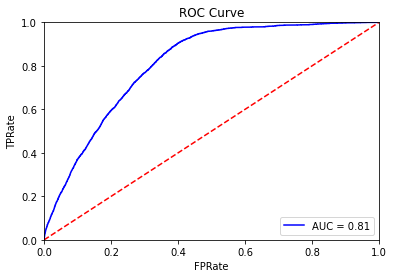

In [26]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
roc_auc = auc(fpr, tpr)
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPRate')
plt.xlabel('FPRate')
plt.show()

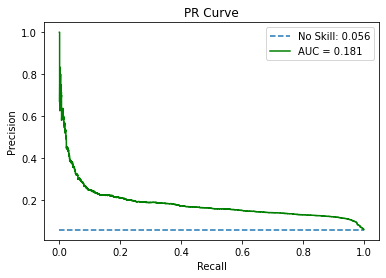

In [27]:
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test==2]) / len(y_test)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle= '--', label= f'No Skill: {no_skill:.3f}')

pr_auc = auc(recall, precision)
plt.title('PR Curve')
plt.plot(recall, precision, 'g', label = 'AUC = %0.3f' % pr_auc)
plt.legend(loc = 'upper right')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [28]:
from sklearn.metrics import average_precision_score
print(f'PR_AUC = {pr_auc}')
print(f'AP     = {average_precision_score(y_test, prob1, pos_label=2)}')

PR_AUC = 0.1811333939588058
AP     = 0.18136170986637615


# Threshold Moving

In [29]:
prob1

array([0.02478109, 0.07963027, 0.54984926, ..., 0.57985189, 0.14727593,
       0.13393383])

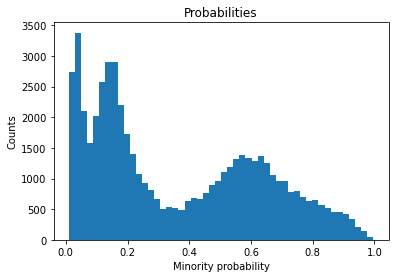

In [30]:
plt.title('Probabilities')
plt.hist(prob1, bins=50)
plt.ylabel('Counts')
plt.xlabel('Minority probability')
plt.show()

(6413,)


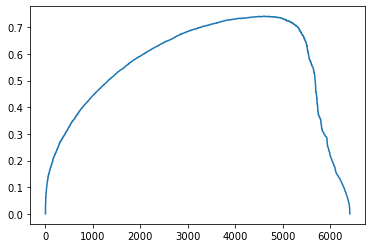

In [31]:
gmeans = np.sqrt(tpr * (1-fpr))
print(gmeans.shape)
plt.plot(gmeans)
plt.show()

In [32]:
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print(f'max_ix = {ix}')
print( ' Best Threshold=%f, G-mean=%.3f ' % (thresholds[ix], gmeans[ix]))

max_ix = 4625
 Best Threshold=0.470176, G-mean=0.741 


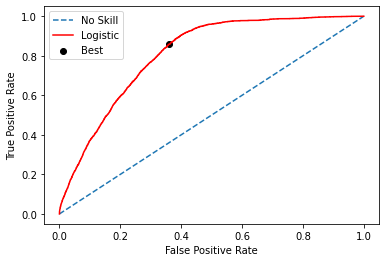

In [33]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, 'r', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [34]:
print(f'ix = {ix}; fpr[ix] = {fpr[ix]}; tpr[ix]={tpr[ix]}')

ix = 4625; fpr[ix] = 0.3590944574551132; tpr[ix]=0.8578794714792136


In [35]:
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)
print( ' Best Threshold=%f, F-measure=%.3f ' % (pr_thresh[ix], fscore[ix]))

 Best Threshold=0.640078, F-measure=0.243 


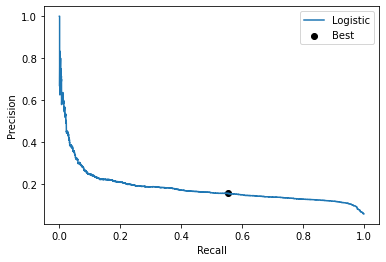

In [36]:
#no_skill = len(y_test[y_test==1]) / len(y_test)
#plt.plot([0,1], [no_skill,no_skill], linestyle= '--' , label= 'No Skill' )
plt.plot(recall, precision, label= 'Logistic' )
plt.scatter(recall[ix], precision[ix], marker= 'o' , color= 'black' , label= 'Best' )
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()